In [1]:
import pandas as pd
import numpy as np

In [2]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, GRU, Dense, SpatialDropout1D
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [3]:
df=pd.read_csv(r"C:\Users\omkar\OneDrive\Documents\Internship\New\Sentiment_140 (2).csv")

In [4]:
import random
import tensorflow as tf

In [5]:
random.seed(45)
np.random.seed(45)
tf.random.set_seed(45)

In [6]:
MAX_NB_WORDS = 50000  
MAX_SEQUENCE_LENGTH = 250 
EMBEDDING_DIM = 32  
epochs = 50  
batch_size = 64 

In [7]:
from sklearn.preprocessing import OneHotEncoder

In [8]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, GRU, Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [9]:
import keras

In [10]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['review'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 96714 unique tokens.


In [11]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['review'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 96714 unique tokens.


In [12]:
X = tokenizer.texts_to_sequences(df['review'].values) 
X = keras.preprocessing.sequence.pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH) 
print('Shape of data tensor:', X.shape) 
Y = df["sentiment"]
enc = OneHotEncoder(handle_unknown='ignore') 
Y = enc.fit_transform(Y.values.reshape(-1,1)).toarray() 

Shape of data tensor: (104858, 250)


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, random_state = 42) 
print(X_train.shape,Y_train.shape) 

(73400, 250) (73400, 2)


In [14]:
print(X_test.shape,Y_test.shape) 

(31458, 250) (31458, 2)


In [15]:
epochs = 20 #10-87% 
batch_size = 64

In [16]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, mask_zero=True), 
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64,  return_sequences=True)), 
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)), 
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(2) 
])

In [17]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), 
              optimizer=tf.keras.optimizers.Adam(1e-4), 
              metrics=['accuracy']) 

In [18]:
history1 = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, 
                    validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)])

Epoch 1/20
1147/1147 [==============================] - 486s 405ms/step - loss: 0.5150 - accuracy: 0.7614 - val_loss: 0.4072 - val_accuracy: 0.8195
Epoch 2/20
1147/1147 [==============================] - 513s 447ms/step - loss: 0.3653 - accuracy: 0.8479 - val_loss: 0.3879 - val_accuracy: 0.8313
Epoch 3/20
1147/1147 [==============================] - 450s 393ms/step - loss: 0.3181 - accuracy: 0.8737 - val_loss: 0.3975 - val_accuracy: 0.8273
Epoch 4/20
1147/1147 [==============================] - 613s 534ms/step - loss: 0.2834 - accuracy: 0.8912 - val_loss: 0.4154 - val_accuracy: 0.8243
Epoch 5/20
1147/1147 [==============================] - 446s 389ms/step - loss: 0.2558 - accuracy: 0.9051 - val_loss: 0.4342 - val_accuracy: 0.8206


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          1600000   
                                                                 
 bidirectional (Bidirection  (None, None, 128)         37632     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                31104     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 1

In [20]:
y_pred = model.predict(X_test)
print(y_pred)
y_pred_labels = np.argmax(y_pred, axis=1)
print(y_pred_labels)


984/984 [==============================] - 61s 58ms/step
[[ 4.1827083  -4.3447437 ]
 [-1.6739532   1.62234   ]
 [ 2.2421281  -2.2633781 ]
 ...
 [-2.1080332   2.0597718 ]
 [-0.9505379   0.91574824]
 [ 3.045223   -3.189149  ]]
[0 1 0 ... 1 1 0]


In [21]:
print(Y_test)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [22]:
Y_test_labels = np.argmax(Y_test, axis=1)

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

              precision    recall  f1-score   support

           0       0.85      0.92      0.89     22190
           1       0.77      0.61      0.68      9268

    accuracy                           0.83     31458
   macro avg       0.81      0.77      0.78     31458
weighted avg       0.83      0.83      0.82     31458



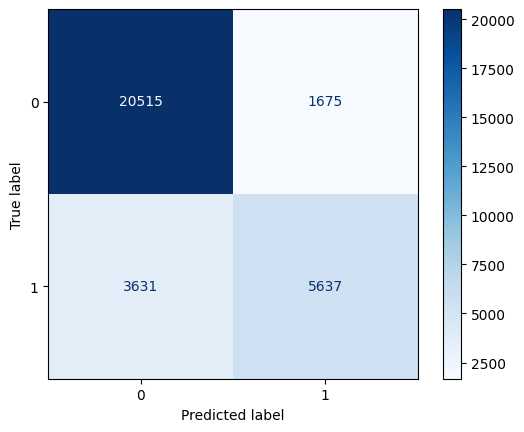

In [24]:
print(classification_report(Y_test_labels,y_pred_labels))
cm = confusion_matrix(Y_test_labels,y_pred_labels, labels=[0, 1 ])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()